In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    N = len(y)
    w = np.dot(np.linalg.inv(np.dot(tx.T,tx)) , np.dot(tx.T,y))
    mse = 1/(2*N)*np.sum((y- np.dot(tx,w))**2)
    # Print the results
    print("Least Squares: loss*={l}, w0*={w0}, w1*={w1}".format(
            l=mse, w0=w[0], w1=w[1]))
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
from grid_search import generate_w, get_best_parameters

def compute_loss(y, tx, w):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    N = len(y)
    fx_n = tx.dot(w.T) #Multiple Linear Regression
    L = 1/(2*N) * (sum((y-fx_n)**2))  #for MSE
    #L = 1/N * (sum(np.absolute(y-fx_n))) #for MAE
    #print (L)
    return L

def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros(shape=(len(w0), len(w1)))  #matrix of all possible values of loss
    
    #w0 and w1 are already populated by grid_help.py :: generate_w
    for i0 in range(0,len(w0)):
        for i1 in range(0,len(w1)):
            weights = np.array([w0[i0], w1[i1]])
            losses[i0, i1] = compute_loss(y, tx, weights)

    return losses

def do_grid_search(y, tx):
    #linear reg: tx = w0 + w1d1 where w0=1 (linear regression)
    grid_w0, grid_w1 = generate_w(num_intervals=30)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    # Print the results
    print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}".format(
            l=loss_star, w0=w0_star, w1=w1_star))

    # Plot the results
    #fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
    #fig.set_size_inches(10.0,6.0)
    #fig.savefig("grid_plot")  # Optional saving

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    mse, w = least_squares(y,tx) #w has dim 2, w[0] is w0 and w[1] is w1
    do_grid_search(y, tx)

test_your_least_squares()

Least Squares: loss*=15.385887868829402, w0*=73.29392200210505, w1*=13.479712434989228
Grid Search: loss*=20.759339381144258, w0*=75.86206896551724, w1*=15.517241379310349


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [4]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [16]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    basis_matrix = np.zeros(shape=(len(x), degree+1))
    for i in range(0,len(x)):
        for j in range(0,degree+1):
            basis_matrix[i,j] = x[i]**j 
    return basis_matrix

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Least Squares: loss*=0.11133351726547978, w0*=0.8343183464933548, w1*=-0.2897661680224678
Processing 1th experiment, degree=1, rmse=0.47187607963421874
Least Squares: loss*=0.03343252619709059, w0*=-0.11521168588068775, w1*=1.5846646935074276
Processing 2th experiment, degree=3, rmse=0.258582776677375
Least Squares: loss*=0.031164734143886333, w0*=0.3223566349151952, w1*=-0.40599016917985864
Processing 3th experiment, degree=7, rmse=0.24965870360909242
Least Squares: loss*=0.03333190367387615, w0*=0.8499421998858452, w1*=-3.7761071920394897
Processing 4th experiment, degree=12, rmse=0.25819335264052073


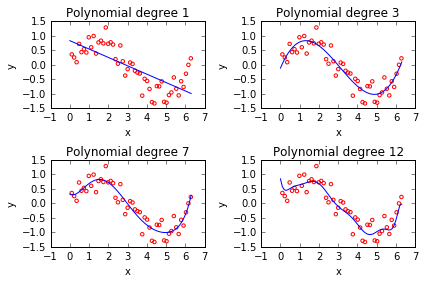

In [18]:
from plots import *
import math

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        basis_matrix = build_poly(x, degree)
        #print (basis_matrix[:5,:2])
        mse, w = least_squares(y, basis_matrix)
        rmse = math.sqrt(2*mse) #from tutorial pdf
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, w, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [26]:
import random

def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    size_data = len(x)*ratio
    #random.shuffle(x) #(has to shuffle y accordingly)
    x_data = x[:size_data]
    y_data = y[:size_data]
    x_test = x[size_data:]
    y_test = y[size_data:]
    return x_data, x_test, y_data, y_test

Then, test your `split_data` function below.

In [27]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    x_data, x_test, y_data, y_test = split_data(x,y,ratio,seed)
    
    basis_matrix_data = build_poly(x_data, degree)
    mse_data, w_data = least_squares(y_data, basis_matrix_data)
    rmse_tr = math.sqrt(2*mse_data) #from tutorial pdf
    
    #we compute the MSE for test data, given TRAINING DATA weights
    basis_matrix_test = build_poly(x_test, degree)
    N = len(y_test)
    mse_test = 1/(2*N)*np.sum((y_test- np.dot(basis_matrix_test,w_data))**2)
    rmse_te = math.sqrt(2*mse_test)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

Least Squares: loss*=0.11898985425518277, w0*=0.8259415934190649, w1*=-0.28324146362806873
proportion=0.9, degree=1, Training RMSE=0.488, Testing RMSE=0.296
Least Squares: loss*=0.035270345761418895, w0*=-0.11169989342098319, w1*=1.585002706289906
proportion=0.9, degree=3, Training RMSE=0.266, Testing RMSE=0.194
Least Squares: loss*=0.03294725580722441, w0*=0.35334060179593507, w1*=-0.6409355009964202
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.186
Least Squares: loss*=0.04262688754014317, w0*=1.2455001082271338, w1*=-6.8836265206336975
proportion=0.9, degree=12, Training RMSE=0.292, Testing RMSE=0.165
Least Squares: loss*=0.10474334583943025, w0*=0.6869805257711731, w1*=-0.21062892272235578
proportion=0.5, degree=1, Training RMSE=0.458, Testing RMSE=0.547
Least Squares: loss*=0.03401481270687029, w0*=-0.04496930812167932, w1*=1.4320884692096456
proportion=0.5, degree=3, Training RMSE=0.261, Testing RMSE=0.267
Least Squares: loss*=0.026830721006490924, w0*=0.656286727

/Users/bmagalha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/bmagalha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/bmagalha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/bmagalha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Ridge Regression
Please fill in the function below.

In [34]:
def ridge_regression(y, tx, lamb, degree):
    """implement ridge regression."""
    #same as before, we just added +lamb*np.identity
    #remember: dimensionality is M+1!
    w = np.dot(np.linalg.inv(np.dot(tx.T,tx)+lamb*np.identity(degree+1)) , np.dot(tx.T,y))
    return w

In [37]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10) #Reminder: lamda is a constant that defines how much we penalize the weights vector  
    x_data, x_test, y_data, y_test = split_data(x,y,ratio,seed)

    # ***************************************************
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    basis_matrix_data = build_poly(x_data, degree)
    N = len(y_data)
    for idx, lamb in enumerate(lambdas):
        w_data = ridge_regression(y_data, basis_matrix_data, lamb, degree)
        mse_data = 1/(2*N)*np.sum((y_data- np.dot(basis_matrix_data,w_data))**2)
        rmse_data = math.sqrt(2*mse_data)
        print("lamdba={l:.3f}, proportion={p}, degree={d}, Training RMSE={tr:.3f}".format(
        l=lamb, p=ratio, d=degree, tr=rmse_data)) 

seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

lamdba=0.001, proportion=0.5, degree=7, Training RMSE=0.234
lamdba=0.003, proportion=0.5, degree=7, Training RMSE=0.238
lamdba=0.008, proportion=0.5, degree=7, Training RMSE=0.243
lamdba=0.022, proportion=0.5, degree=7, Training RMSE=0.246
lamdba=0.060, proportion=0.5, degree=7, Training RMSE=0.248
lamdba=0.167, proportion=0.5, degree=7, Training RMSE=0.249
lamdba=0.464, proportion=0.5, degree=7, Training RMSE=0.250
lamdba=1.292, proportion=0.5, degree=7, Training RMSE=0.253
lamdba=3.594, proportion=0.5, degree=7, Training RMSE=0.265
lamdba=10.000, proportion=0.5, degree=7, Training RMSE=0.299


/Users/bmagalha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/bmagalha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/bmagalha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/bmagalha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
